# Defining the Beta-Function
Let $A=\{a_1,a_2,\ldots,a_m\}$ and $B=\{b_1,b_2,\ldots,b_n\}$ be two sets of positive integers. We define the function $F_{\beta}$ as follows:
\begin{equation}
F_{\beta}(A)=\sum_{S_A\in2^A}\prod_{a\in S_A}\frac{1}{a}=\frac{1}{a_1}+\frac{1}{a_2}+\ldots+\frac{1}{a_m}+\frac{1}{a_1a_2}+\ldots+\frac{1}{a_1a_m}+\ldots+\frac{1}{a_1a_2\ldots a_m}
\end{equation}
The power set of $A$, denoted with $2^A$ is the set of all possible subsets of $A$, see for example Mazur (2010, p. 5).
We define a relation $\sim_{\beta}$ between two sets such that two sets $A\sim_{\beta}B$ relate to each other when $F_{\beta}(A)=F_{\beta}(B)$. 
# References
David R. Mazur (2010). Combinatorics: A Guided Tour. Washington, DC: The Mathematical Association of America.

In [62]:
from itertools import chain, combinations
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

def F_Beta(integer_set):
    powset = list(powerset(integer_set))
    F=0
    for subset in powset:
        prod=1
        for element in subset:
            prod=prod/element
        F+=prod
    return F

# Beta(A,1) - F_Beta(A) = 1
def Beta(integer_set, k):
    if len(integer_set) == 0:
        return 0
    beta=1
    for element in integer_set:
        beta *= (1+1/(k*element))
    return beta

def distance(set_a, set_b):
    return abs(F_Beta(set_a) - F_Beta(set_b))

def generate_collatz_set(v1, n, k):
    a = []
    if n<1 or v1%2==0:
        return a
    vi = v1
    a.append(vi)
    for i in range(n-1):
        vi = k*vi+1
        while vi%2 == 0:
            vi /= 2
        if vi in a:
            return a
        elif vi == 1:
            a.append(int(vi))
            return a
        else:
            a.append(int(vi))
    return a

#print(generate_collatz_set(1, 2, 3))
A=[135,85,215]
B=[65,165,415]
C=[6335,17919]
D=[4887,110591]

print(F_Beta(C))
print(Beta(D,1))
print(distance(A,B))
print(generate_collatz_set(17,30,5))

0.00021366869143188546
1.0002136686914318
0.0
[17, 43, 27]


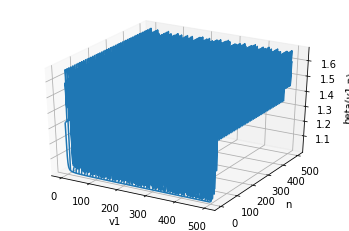

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import csv

max=500
x = np.linspace(0, max-1, max)
y = np.linspace(0, max-1, max)
X, Y = np.meshgrid(x, y)
X = X.astype(int)
Y = Y.astype(int)
Z = np.zeros(shape=(max,max))
arr_csv = [[]]
k=3

def func(x, y):
    v1 = 2*x+1
    n = y+1
    collatz_set = generate_collatz_set(v1,n,k)
    beta = float(Beta(collatz_set, k))
    #print("{} {} {}".format(n, beta, collatz_set))
    return beta

fn_vectorized = np.vectorize(func)
Z = fn_vectorized(X, Y)
#print(Z)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        arr_csv.append([i,j,Z[i,j]])

with open("c:/temp/collatz_beta.csv", "w", newline='') as my_csv:
    csvWriter = csv.writer(my_csv, delimiter=',')
    csvWriter.writerow(["v1", "n", "beta(v1,n,k={})".format(k)])
    csvWriter.writerows(arr_csv)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('v1')
ax.set_ylabel('n')
ax.set_zlabel('beta(v1,n)')
plt.show()